In [0]:
!pip install pyspark py4j

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-e933286e-91da-467d-b59c-0d4fa01bf78e/bin/python -m pip install --upgrade pip' command.


In [0]:
from pyspark.sql import SparkSession

In [0]:
df = spark.read.csv("dbfs:/FileStore/sanjufolder/Abalone_Dataset.csv",header=True , inferSchema=True)

In [0]:
df.printSchema()

root
 |-- Sex: string (nullable = true)
 |-- Length: double (nullable = true)
 |-- Diameter: double (nullable = true)
 |-- Height: double (nullable = true)
 |-- Whole weight: double (nullable = true)
 |-- Shucked weight: double (nullable = true)
 |-- Viscera weight: double (nullable = true)
 |-- Shell weight: double (nullable = true)
 |-- Rings: integer (nullable = true)



In [0]:
df.columns

Out[53]: ['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

In [0]:
df.dtypes

Out[54]: [('Sex', 'string'),
 ('Length', 'double'),
 ('Diameter', 'double'),
 ('Height', 'double'),
 ('Whole weight', 'double'),
 ('Shucked weight', 'double'),
 ('Viscera weight', 'double'),
 ('Shell weight', 'double'),
 ('Rings', 'int')]

In [0]:
from pyspark.sql.functions import isnull

for i in df.columns:


 # Check for null values in the "value" column
 null_count = df.filter(isnull(i)).count()

 print("Number of null values: {}".format(null_count),i)


Number of null values: 0 Sex
Number of null values: 0 Length
Number of null values: 0 Diameter
Number of null values: 0 Height
Number of null values: 0 Whole weight
Number of null values: 0 Shucked weight
Number of null values: 0 Viscera weight
Number of null values: 0 Shell weight
Number of null values: 0 Rings


In [0]:
# Compute the value counts in each column
for column in df.columns:
    counts = df.groupBy(column).count()
    counts.show()

+---+-----+
|Sex|count|
+---+-----+
|  F| 1307|
|  M| 1528|
|  I| 1342|
+---+-----+

+------+-----+
|Length|count|
+------+-----+
|  0.66|   48|
| 0.445|   29|
| 0.645|   70|
| 0.355|   20|
|  0.16|    4|
| 0.275|   19|
|  0.18|    4|
| 0.585|   64|
|   0.2|    6|
| 0.815|    1|
| 0.545|   57|
| 0.415|   36|
| 0.185|    4|
| 0.295|   14|
| 0.755|    3|
| 0.245|    6|
|  0.39|   22|
| 0.695|   27|
|  0.72|   30|
|  0.24|    7|
+------+-----+
only showing top 20 rows

+--------+-----+
|Diameter|count|
+--------+-----+
|   0.445|   58|
|   0.355|   71|
|    0.16|    4|
|   0.275|   36|
|    0.18|   10|
|   0.585|   10|
|     0.2|   17|
|   0.545|   28|
|   0.415|   61|
|   0.185|    8|
|   0.295|   18|
|   0.245|   13|
|    0.39|   63|
|    0.24|   19|
|    0.54|   33|
|   0.315|   29|
|    0.21|   18|
|     0.1|    2|
|   0.265|   37|
|    0.45|  139|
+--------+-----+
only showing top 20 rows

+------+-----+
|Height|count|
+------+-----+
|  0.07|   47|
| 0.035|    6|
|   0.0|    2|
|  0.

In [0]:
#find outliers in data
from pyspark.sql.functions import col, stddev, mean

# Create a DataFrame with some data
for i in numerical_df:

 # Compute the mean and standard deviation of the data
 mean_value = df.agg(mean(col(i)).alias("mean")).collect()[0]["mean"]
 stddev_value = df.agg(stddev(col(i)).alias("stddev")).collect()[0]["stddev"]

 # Compute the z-score for each data point
 df_with_zscore = df.withColumn("zscore", (col(i) - mean_value) / stddev_value)

 # Find outliers with a z-score greater than 3
 outliers = df_with_zscore.filter(col("zscore") > 3)
 outliers.show()

In [0]:
df1= df.withColumn("age", df["Rings"]+ 1.5)

In [0]:
df1.show()

+---+------+--------+------+------------+--------------+--------------+------------+-----+----+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weight|Shell weight|Rings| age|
+---+------+--------+------+------------+--------------+--------------+------------+-----+----+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|         0.101|        0.15|   15|16.5|
|  M|  0.35|   0.265|  0.09|      0.2255|        0.0995|        0.0485|        0.07|    7| 8.5|
|  F|  0.53|    0.42| 0.135|       0.677|        0.2565|        0.1415|        0.21|    9|10.5|
|  M|  0.44|   0.365| 0.125|       0.516|        0.2155|         0.114|       0.155|   10|11.5|
|  I|  0.33|   0.255|  0.08|       0.205|        0.0895|        0.0395|       0.055|    7| 8.5|
|  I| 0.425|     0.3| 0.095|      0.3515|         0.141|        0.0775|        0.12|    8| 9.5|
|  F|  0.53|   0.415|  0.15|      0.7775|         0.237|        0.1415|        0.33|   20|21.5|
|  F| 0.545|   0.425| 0.125|       0.768

In [0]:
# Separate the numerical and categorical columns
numerical_cols = [c for c, t in df1.dtypes if t in ["int", "double"]]
categorical_cols = [c for c, t in df1.dtypes if t == "string"]

# Select the numerical and categorical columns of the DataFrame
numerical_df = df1.select([col(c).cast("double") for c in numerical_cols])
categorical_df = df1.select(categorical_cols)

# Show the resulting DataFrames
numerical_df.show()
categorical_df.show()

+------+--------+------+------------+--------------+--------------+------------+-----+----+
|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weight|Shell weight|Rings| age|
+------+--------+------+------------+--------------+--------------+------------+-----+----+
| 0.455|   0.365| 0.095|       0.514|        0.2245|         0.101|        0.15| 15.0|16.5|
|  0.35|   0.265|  0.09|      0.2255|        0.0995|        0.0485|        0.07|  7.0| 8.5|
|  0.53|    0.42| 0.135|       0.677|        0.2565|        0.1415|        0.21|  9.0|10.5|
|  0.44|   0.365| 0.125|       0.516|        0.2155|         0.114|       0.155| 10.0|11.5|
|  0.33|   0.255|  0.08|       0.205|        0.0895|        0.0395|       0.055|  7.0| 8.5|
| 0.425|     0.3| 0.095|      0.3515|         0.141|        0.0775|        0.12|  8.0| 9.5|
|  0.53|   0.415|  0.15|      0.7775|         0.237|        0.1415|        0.33| 20.0|21.5|
| 0.545|   0.425| 0.125|       0.768|         0.294|        0.1495|        0.26|

In [0]:
#encoding sex column
from pyspark.ml.feature import StringIndexer



# create a StringIndexer to encode the 'category' column
indexer = StringIndexer(inputCol='Sex', outputCol='sex_index')

# fit the indexer to the data and transform the data
indexed = indexer.fit(df1).transform(df1)

# display the encoded data
indexed.show()


+---+------+--------+------+------------+--------------+--------------+------------+-----+----+---------+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weight|Shell weight|Rings| age|sex_index|
+---+------+--------+------+------------+--------------+--------------+------------+-----+----+---------+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|         0.101|        0.15|   15|16.5|      0.0|
|  M|  0.35|   0.265|  0.09|      0.2255|        0.0995|        0.0485|        0.07|    7| 8.5|      0.0|
|  F|  0.53|    0.42| 0.135|       0.677|        0.2565|        0.1415|        0.21|    9|10.5|      2.0|
|  M|  0.44|   0.365| 0.125|       0.516|        0.2155|         0.114|       0.155|   10|11.5|      0.0|
|  I|  0.33|   0.255|  0.08|       0.205|        0.0895|        0.0395|       0.055|    7| 8.5|      1.0|
|  I| 0.425|     0.3| 0.095|      0.3515|         0.141|        0.0775|        0.12|    8| 9.5|      1.0|
|  F|  0.53|   0.415|  0.15|      0.7775|     

In [0]:
df1.dtypes

Out[65]: [('Sex', 'string'),
 ('Length', 'double'),
 ('Diameter', 'double'),
 ('Height', 'double'),
 ('Whole weight', 'double'),
 ('Shucked weight', 'double'),
 ('Viscera weight', 'double'),
 ('Shell weight', 'double'),
 ('Rings', 'int'),
 ('age', 'double')]

In [0]:
v_df1.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Sex,4177,None,None,F,M
Length,4177,0.5239920995930099,0.12009291256479936,0.075,0.815
Diameter,4177,0.407881254488869,0.09923986613365941,0.055,0.65
Height,4177,0.1395163993296614,0.04182705660725731,0.0,1.13
Whole weight,4177,0.82874215944458,0.49038901823099795,0.002,2.8255
Shucked weight,4177,0.35936748862820106,0.22196294903322014,0.001,1.488
Viscera weight,4177,0.18059360785252604,0.10961425025968445,5.0E-4,0.76
Shell weight,4177,0.23883085946851795,0.13920266952238622,0.0015,1.005
Rings,4177,9.933684462532918,3.2241690320681315,1,29


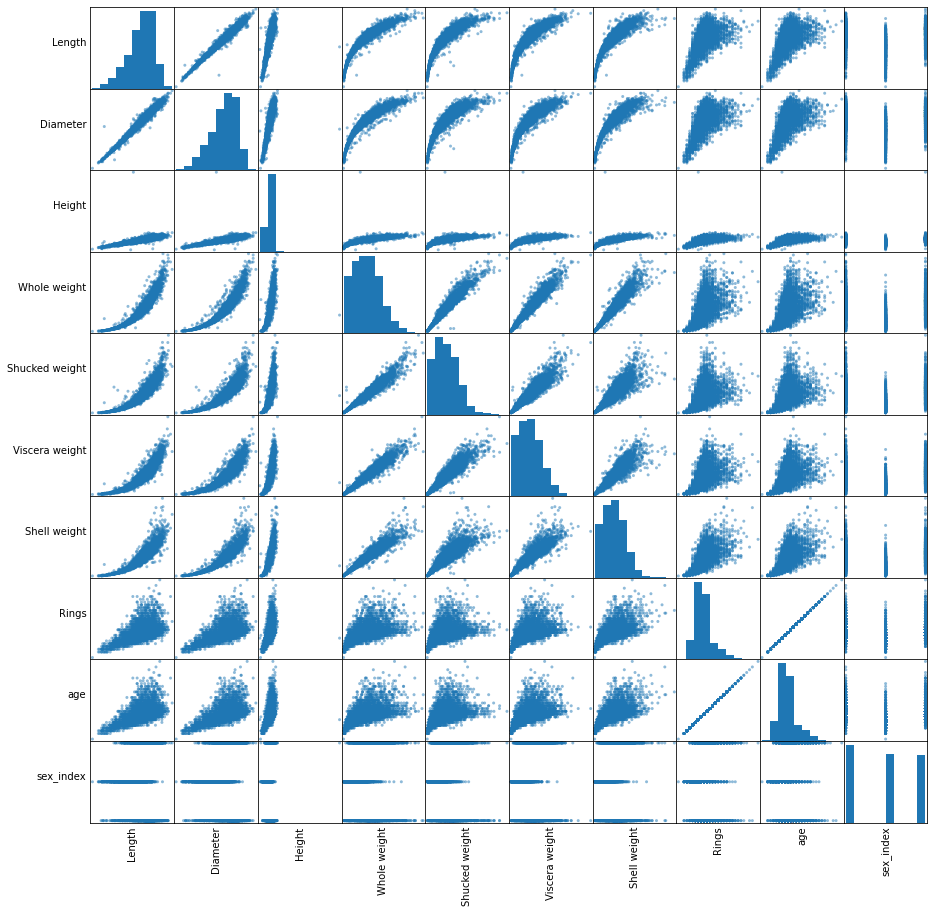

In [0]:
import pandas as pd
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in indexed.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = indexed.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(15, 15))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [0]:
#its hard to find correlation between this columns.

In [0]:
import six
for i in df1.columns:
    if not( isinstance(indexed.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to age for ", i, df1.stat.corr('age',i))

Correlation to age for  Length 0.5567195769296179
Correlation to age for  Diameter 0.5746598513059199
Correlation to age for  Height 0.5574673244580345
Correlation to age for  Whole weight 0.5403896769238994
Correlation to age for  Shucked weight 0.4208836579452148
Correlation to age for  Viscera weight 0.5038192487597699
Correlation to age for  Shell weight 0.6275740445103176
Correlation to age for  Rings 1.0
Correlation to age for  age 1.0


In [0]:
indexed.columns

Out[74]: ['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings',
 'age',
 'sex_index']

In [0]:
#we can drop rings column from the data as it is directly depending upon our target

In [0]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = [
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'sex_index'], outputCol = 'features')
v_df = vectorAssembler.transform(indexed)
v_df = vhouse_df.select(['features', 'age'])
v_df.show(10)

+--------------------+----+
|            features| age|
+--------------------+----+
|[0.455,0.365,0.09...|16.5|
|[0.35,0.265,0.09,...| 8.5|
|[0.53,0.42,0.135,...|10.5|
|[0.44,0.365,0.125...|11.5|
|[0.33,0.255,0.08,...| 8.5|
|[0.425,0.3,0.095,...| 9.5|
|[0.53,0.415,0.15,...|21.5|
|[0.545,0.425,0.12...|17.5|
|[0.475,0.37,0.125...|10.5|
|[0.55,0.44,0.15,0...|20.5|
+--------------------+----+
only showing top 10 rows



In [0]:
# Scale the data
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
scalerModel = scaler.fit(v_df)
data = scalerModel.transform(v_df)

# Show the scaled data
data.show()

+--------------------+----+--------------------+
|            features| age|      scaledFeatures|
+--------------------+----+--------------------+
|[0.455,0.365,0.09...|16.5|[3.78873315904044...|
|[0.35,0.265,0.09,...| 8.5|[2.91441012233880...|
|[0.53,0.42,0.135,...|10.5|[4.41324961382733...|
|[0.44,0.365,0.125...|11.5|[3.66382986808306...|
|[0.33,0.255,0.08,...| 8.5|[2.7478724010623,...|
|[0.425,0.3,0.095,...| 9.5|[3.53892657712568...|
|[0.53,0.415,0.15,...|21.5|[4.41324961382733...|
|[0.545,0.425,0.12...|17.5|[4.53815290478470...|
|[0.475,0.37,0.125...|10.5|[3.95527088031694...|
|[0.55,0.44,0.15,0...|20.5|[4.57978733510383...|
|[0.525,0.38,0.14,...|15.5|[4.37161518350820...|
|[0.43,0.35,0.11,0...|11.5|[3.58056100744481...|
|[0.49,0.38,0.135,...|12.5|[4.08017417127432...|
|[0.535,0.405,0.14...|11.5|[4.45488404414645...|
|[0.47,0.355,0.1,0...|11.5|[3.91363644999782...|
|[0.5,0.4,0.13,0.6...|13.5|[4.16344303191257...|
|[0.355,0.28,0.085...| 8.5|[2.95604455265792...|
|[0.44,0.34,0.1,0...

In [0]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [0]:
#linear regression

In [0]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='age', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9095272691169776,0.0]
Intercept: 2.3992685496134216


In [0]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 0.295752
r2: 0.991815
